<a href="https://colab.research.google.com/github/Jayantsinghkhanna/Jayantsinghkhanna/blob/main/Injury_Prediction_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Athlete_ID                200 non-null    object
 1   Age                       200 non-null    int64 
 2   Gender                    200 non-null    object
 3   Height_cm                 200 non-null    int64 
 4   Weight_kg                 200 non-null    int64 
 5   Position                  200 non-null    object
 6   Training_Intensity        200 non-null    int64 
 7   Training_Hours_Per_Week   200 non-null    int64 
 8   Recovery_Days_Per_Week    200 non-null    int64 
 9   Match_Count_Per_Week      200 non-null    int64 
 10  Rest_Between_Events_Days  200 non-null    int64 
 11  Fatigue_Score             200 non-null    int64 
 12  Performance_Score         200 non-null    int64 
 13  Team_Contribution_Score   200 non-null    int64 
 14  Load_Bala

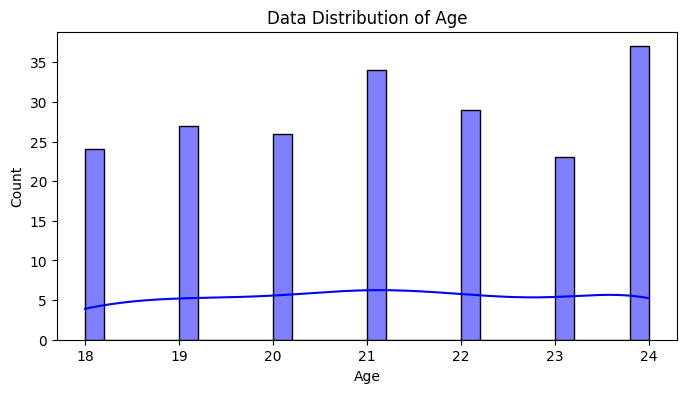

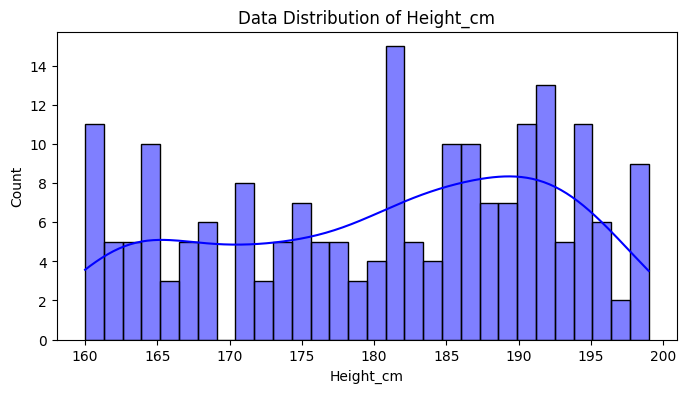

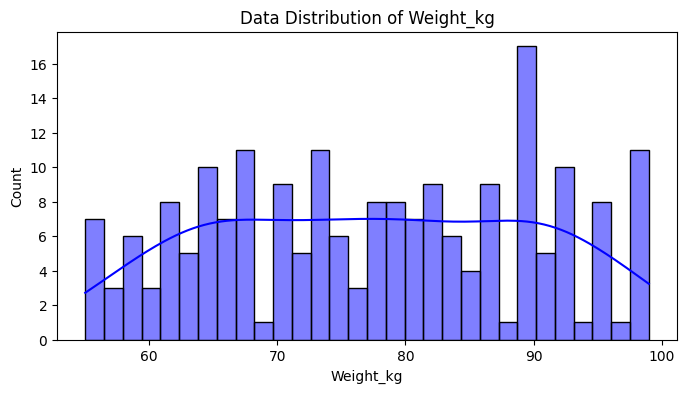

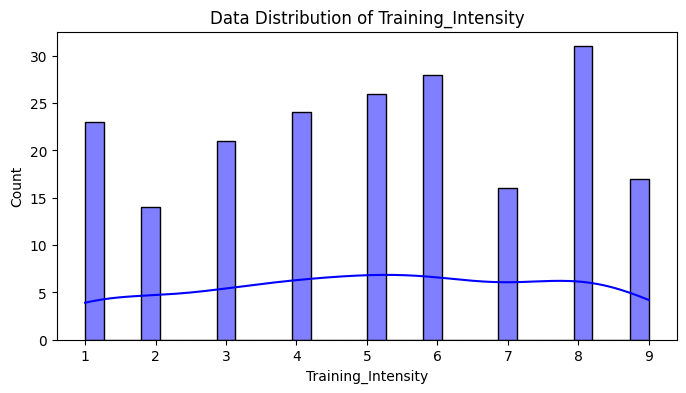

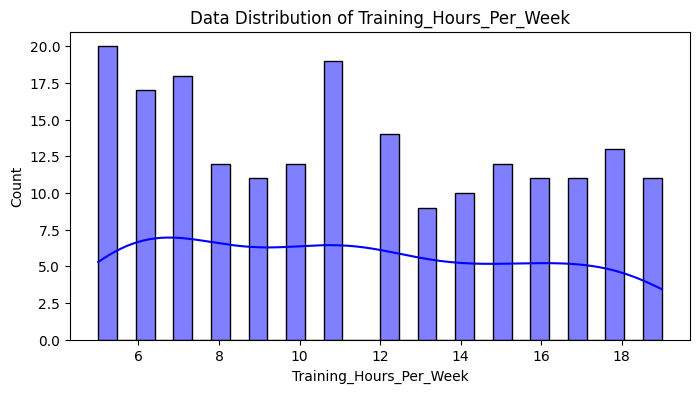

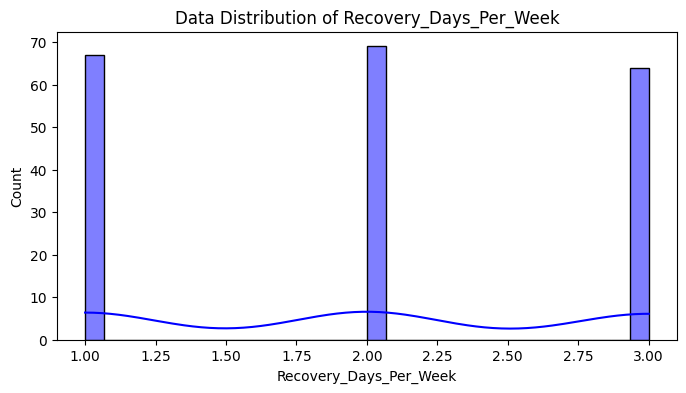

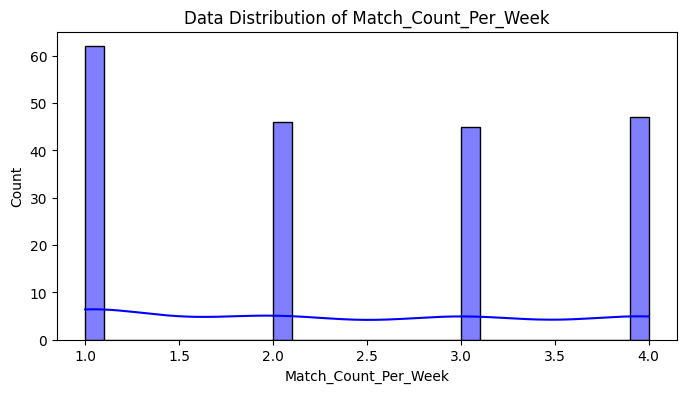

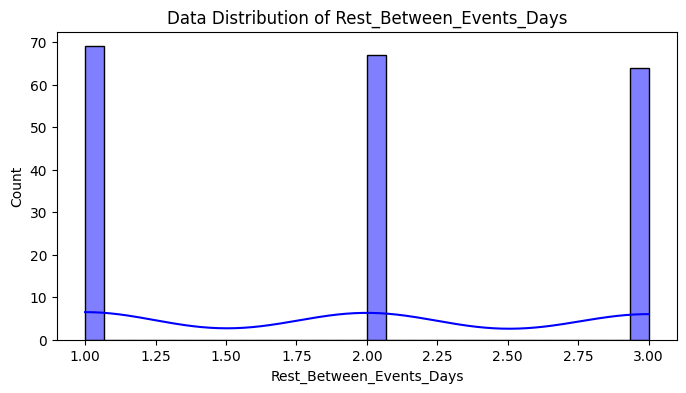

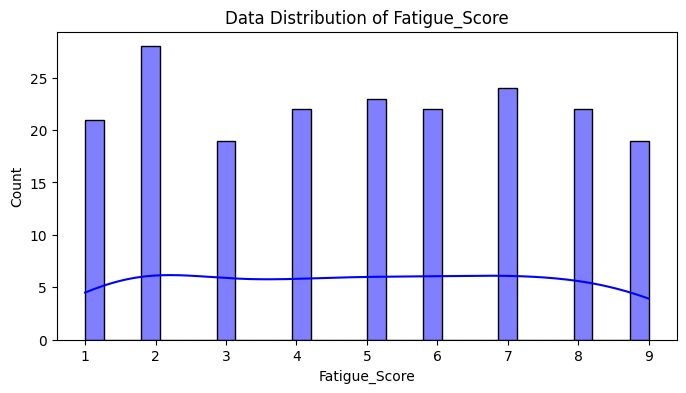

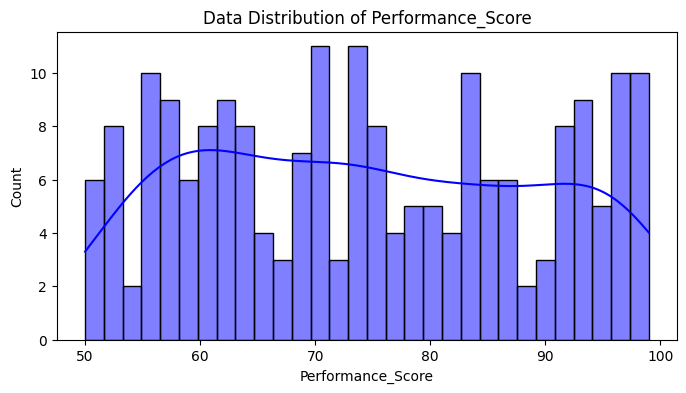

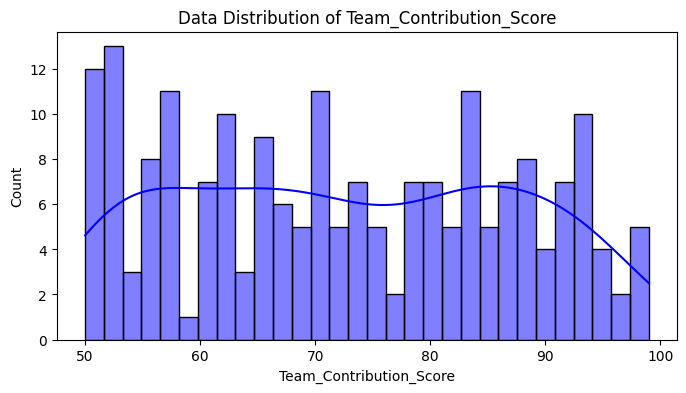

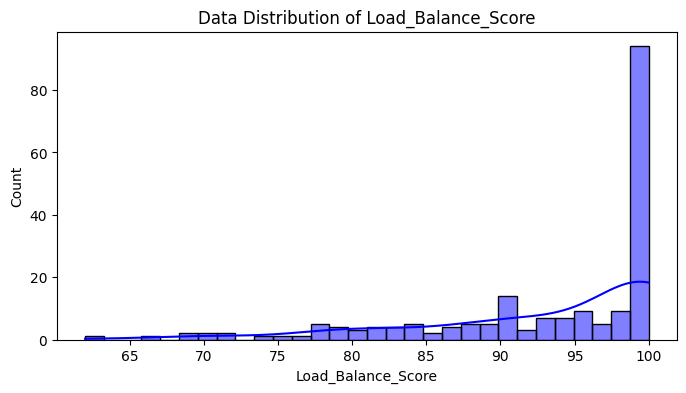

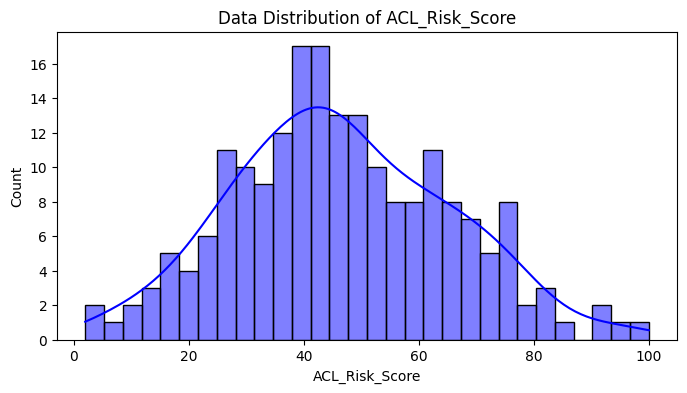

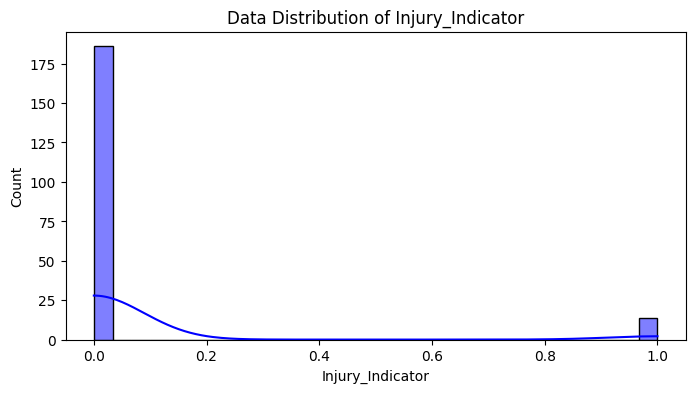

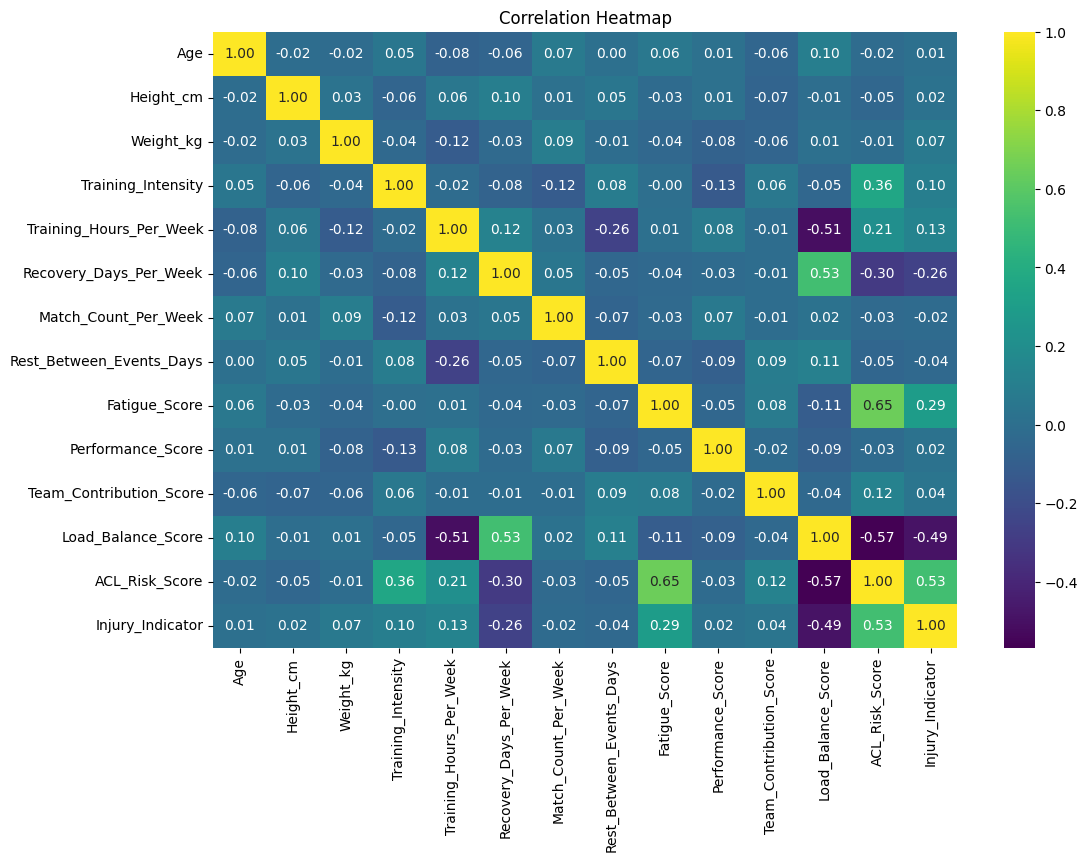

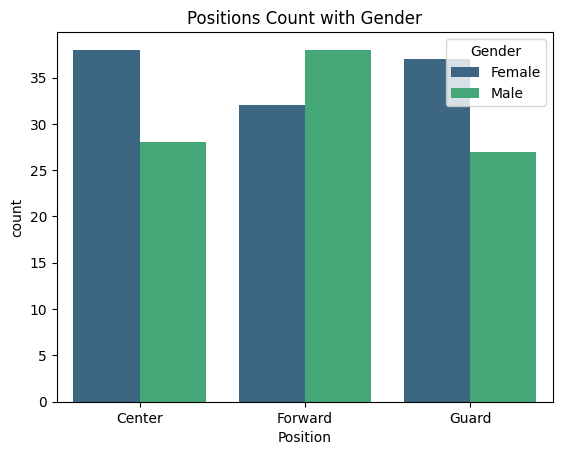

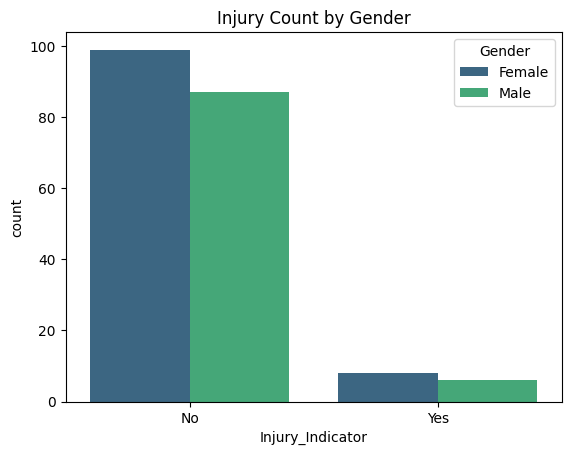


🔹 Training Random Forest...

✅ Random Forest Accuracy: 0.95

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       0.00      0.00      0.00         2

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40

Mean Squared Error: 0.05
Mean Absolute Error: 0.08


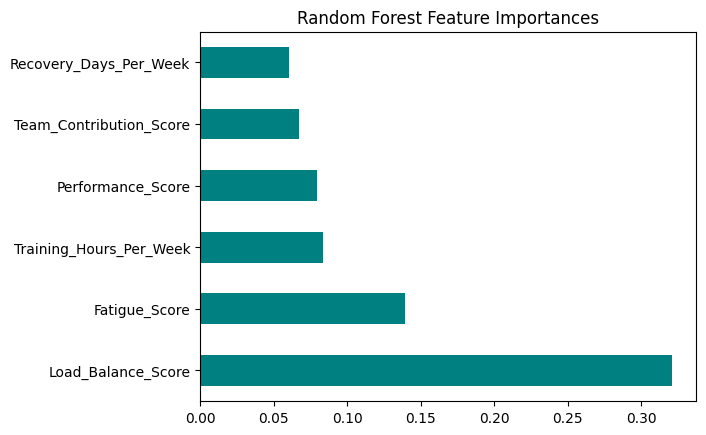


🔹 Training Logistic Regression...

✅ Logistic Regression Accuracy: 0.95

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       0.00      0.00      0.00         2

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40

Mean Squared Error: 0.05
Mean Absolute Error: 0.06

🔹 Training Gradient Boosting...

✅ Gradient Boosting Accuracy: 0.93

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      0.97      0.96        38
           1       0.00      0.00      0.00         2

    accuracy                           0.93        40
   macro avg       0.47      0.49      0.48        40
weighted avg       0.90      0.93      0.91        40

Mean Squared Error: 0.07
Mean Absolute Error: 0.07


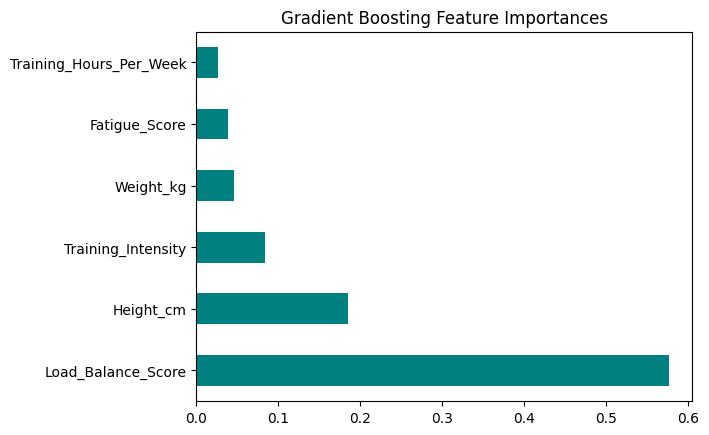


🔹 Training SVC...

✅ SVC Accuracy: 0.95

📊 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        38
           1       0.00      0.00      0.00         2

    accuracy                           0.95        40
   macro avg       0.47      0.50      0.49        40
weighted avg       0.90      0.95      0.93        40

Mean Squared Error: 0.04
Mean Absolute Error: 0.09

🏆 Best Model: Random Forest with Accuracy: 0.95
✅ Model saved as Random_Forest_model.pkl


In [3]:
# athlete_injury_analysis.py
# Full pipeline: Load dataset, EDA, Train multiple models, Evaluate, Save Best Model

import os
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
import joblib
import matplotlib.pyplot as plt

from sklearn.metrics import (
    accuracy_score,
    mean_squared_error,
    mean_absolute_error,
    classification_report
)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

warnings.filterwarnings("ignore")

# ===============================
# 1. Load Dataset
# ===============================
def load_data(file_path):
    df = pd.read_csv(file_path)
    df.columns = df.columns.str.strip()  # clean column names
    return df

# ===============================
# 2. Exploratory Data Analysis
# ===============================
def explore_data(df):
    print("\n📊 Dataset Info:")
    print(df.info())

    print("\n🔎 First 5 Rows:")
    print(df.head())

    print("\n📊 Description:")
    print(df.describe())

    print("\n✅ Missing Values (%):")
    print(df.isna().mean() * 100)

    print("\n✅ Duplicates (%):", df.duplicated().mean() * 100)

    print("\n✅ Unique Values Count:")
    print(df.nunique())

    # Age & Gender distribution
    print("\nProportion of Ages:")
    print(df['Age'].value_counts(normalize=True))

    print("\nProportion of Genders:")
    print(df['Gender'].value_counts(normalize=True))


def visualize_data(df):
    # Distribution of numeric data
    for col in df.select_dtypes(include=["int64", "float64"]).columns:
        plt.figure(figsize=(8, 4))
        sns.histplot(df[col], kde=True, bins=30, color='blue')
        plt.title(f"Data Distribution of {col}")
        plt.show()

    # Correlation heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(df.select_dtypes(include=np.number).corr(),
                annot=True, fmt='.2f', cmap='viridis')
    plt.title("Correlation Heatmap")
    plt.show()

    # Countplots
    sns.countplot(x="Position", data=df, hue="Gender", palette="viridis")
    plt.title("Positions Count with Gender")
    plt.show()

    sns.countplot(x="Injury_Indicator", data=df, hue="Gender", palette="viridis")
    plt.title("Injury Count by Gender")
    plt.xticks([0, 1], ["No", "Yes"])
    plt.show()

# ===============================
# 3. Preprocessing
# ===============================
def preprocess_data(df):
    # Encode categorical
    df["Gender"] = df["Gender"].map({"Male": 0, "Female": 1})
    df["Position"] = df["Position"].map({"Guard": 0, "Center": 1, "Forward": 2})

    features = [
        "Age", "Gender", "Position", "Height_cm", "Weight_kg",
        "Training_Intensity", "Training_Hours_Per_Week",
        "Recovery_Days_Per_Week", "Match_Count_Per_Week",
        "Fatigue_Score", "Performance_Score",
        "Team_Contribution_Score", "Load_Balance_Score"
    ]
    X = df[features]
    y = df["Injury_Indicator"]

    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    return X_scaled, y, features

# ===============================
# 4. Model Training & Evaluation (Multiple Models)
# ===============================
def train_and_evaluate_models(X, y, features):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.2, random_state=42
    )

    models = {
        "Random Forest": RandomForestClassifier(n_estimators=200, max_depth=10, random_state=42),
        "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
        "Gradient Boosting": GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
        "SVC": SVC(kernel="rbf", probability=True, random_state=42)
    }

    trained_models = {}
    best_acc = 0
    best_model_name = None

    for name, model in models.items():
        print(f"\n🔹 Training {name}...")
        model.fit(X_train, y_train)
        predictions = model.predict(X_test)
        prob_predictions = model.predict_proba(X_test)[:, 1]

        acc = accuracy_score(y_test, predictions)
        mse = mean_squared_error(y_test, prob_predictions)
        mae = mean_absolute_error(y_test, prob_predictions)

        print(f"\n✅ {name} Accuracy: {acc:.2f}")
        print("\n📊 Classification Report:\n")
        print(classification_report(y_test, predictions))
        print(f"Mean Squared Error: {mse:.2f}")
        print(f"Mean Absolute Error: {mae:.2f}")

        # Feature importances (only for tree-based models)
        if hasattr(model, "feature_importances_"):
            feature_importances = pd.Series(model.feature_importances_, index=features)
            feature_importances.nlargest(6).plot(kind="barh", color="teal")
            plt.title(f"{name} Feature Importances")
            plt.show()

        trained_models[name] = model

        # Track best model
        if acc > best_acc:
            best_acc = acc
            best_model_name = name

    print(f"\n🏆 Best Model: {best_model_name} with Accuracy: {best_acc:.2f}")
    return trained_models, best_model_name

# ===============================
# 5. Save Model
# ===============================
def save_model(model, filename="athlete_injury_model.pkl"):
    with open(filename, "wb") as f:
        joblib.dump(model, f)
    print(f"✅ Model saved as {filename}")

# ===============================
# Main Execution
# ===============================
if __name__ == "__main__":
    file_path = "/content/collegiate_athlete_injury_dataset.csv"

    df = load_data(file_path)
    explore_data(df)
    visualize_data(df)

    X, y, features = preprocess_data(df)
    trained_models, best_model_name = train_and_evaluate_models(X, y, features)

    # Save only the best model
    save_model(trained_models[best_model_name], filename=f"{best_model_name.replace(' ', '_')}_model.pkl")
